In [2]:
import numpy as np
from matplotlib import pyplot as plt
%matplotlib notebook

import pickle
import glob

This Jupyter Notebook file is meant to just introduce you to how the data is organized within pickled files.

In [64]:
#Just highlighting a possible use of the 'glob' function -- you may find this useful. 
# But you don't have to use it.
# Note that if you have a Mac, you might need to change the directory location below. 
fls = glob.glob(".\\F23\\*.p")

In [65]:
#List the files found using the 'glob' function:
fls

['.\\F23\\200mA_10Hz_trial2.p',
 '.\\F23\\200mA_12Hz_trial2.p',
 '.\\F23\\200mA_14Hz_trial2.p',
 '.\\F23\\200mA_6Hz_trial2.p',
 '.\\F23\\200mA_8Hz_trial2.p']

In [80]:
#Loading in a saved data set using the 'pickle' function
data = pickle.load(open(fls[2],'rb'))
freq_of_osc = 14

In [81]:
#Let's print out what is stored within this saved data set.
# Since this is a dictionary, we'll print out what the keys of it are.
print(data.keys())

dict_keys(['Fs', 'axis', 'dataOut', 'inputData_0', 'inputData_1', 'inputData_2', 'inputData_3'])


In [82]:
#The key 'Fs' is the frequency at which data was saved (e.g., sampling frequency). 
print("Looking at the data saved with the 'Fs' key, the sampling frequency was %i Hz." % data['Fs'])

Looking at the data saved with the 'Fs' key, the sampling frequency was 1000 Hz.


In [83]:
#The key 'axis' will tell us whether the stage oscillated along the x- or y-axis
print("The stage was oscillated along the %s as the bead was trapped." % data['axis'])

The stage was oscillated along the x-axis as the bead was trapped.


In [84]:
#We now deal with arrays of data that were saved.
print("The 'dataOut' array has a length of %i." % len(data['dataOut']))

The 'dataOut' array has a length of 929.


In [85]:
#Define the time array. We can do this as we know the sampling frequency.
times = np.arange(0,len(data['dataOut']))*(1./data['Fs'])

<IPython.core.display.Javascript object>


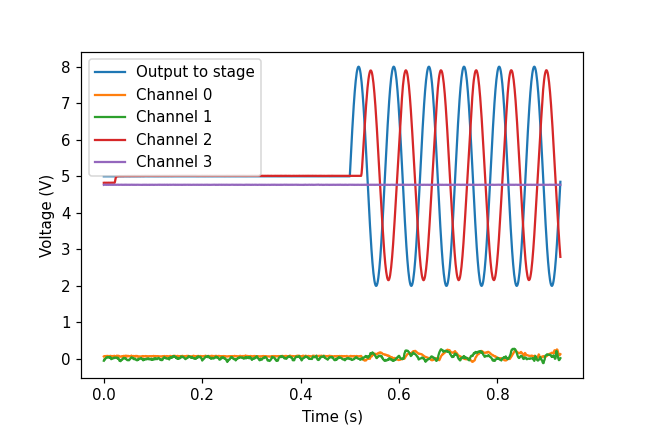

Text(0, 0.5, 'Voltage (V)')

In [86]:
fig = plt.figure()
plt.plot(times, data['dataOut'], label='Output to stage')
plt.plot(times, data['inputData_0'], label='Channel 0')
plt.plot(times, data['inputData_1'], label='Channel 1')
plt.plot(times, data['inputData_2'], label='Channel 2')
plt.plot(times, data['inputData_3'], label='Channel 3')
plt.legend(loc=2)
plt.xlabel('Time (s)')
plt.ylabel('Voltage (V)')

<IPython.core.display.Javascript object>


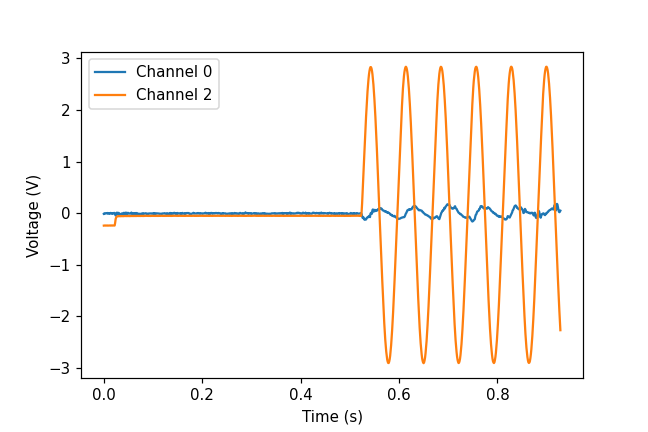

Text(0, 0.5, 'Voltage (V)')

In [87]:
fig = plt.figure()
plt.plot(times, data['inputData_0']-data['inputData_0'].mean(), label='Channel 0')
plt.plot(times, data['inputData_2']-data['inputData_2'].mean(), label='Channel 2')
plt.legend(loc=2)
plt.xlabel('Time (s)')
plt.ylabel('Voltage (V)')

In [88]:
#Set up a color palette
stageX_color = 'tab:blue'
stageY_color = 'tab:orange'
qpdX_color = 'tab:green'
qpdY_color = 'tab:red'
output_color = 'tab:brown'

In [89]:
freq_of_oscillation = 14.0
cycle_in_data_pts = (1/freq_of_oscillation)*data['Fs']
print("Period of cycle in data points: ", cycle_in_data_pts)
cycle_in_data_pts = int(cycle_in_data_pts)

Period of cycle in data points:  71.42857142857143


<IPython.core.display.Javascript object>


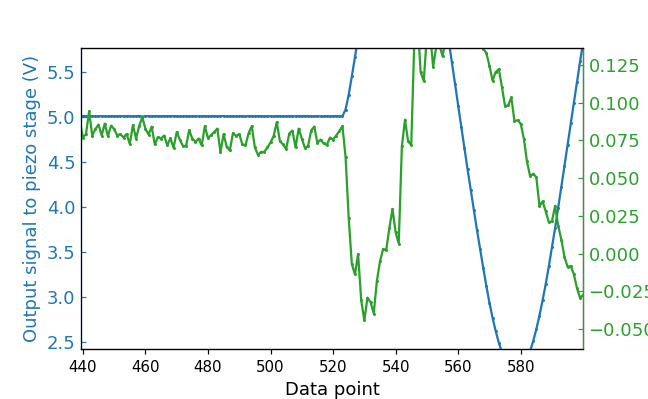

In [93]:
%matplotlib notebook

fig,ax = plt.subplots(figsize=(4,4/1.618)) #create figure

ax2 = ax.twinx() #this will allow us to have two separate y-axes

starting_pt = 0

ax.plot(data['inputData_2'][starting_pt:],'-o', ms=1, color=stageX_color, label="x-position")
ax2.plot(data['inputData_0'][starting_pt:],'-o', ms=1, color=qpdX_color, label="QPD X-diff")
ax.set_xlabel("Data point", fontsize=12, color='k')
ax.set_ylabel("Output signal to piezo stage (V)", fontsize=12, color=stageX_color)
ax2.set_ylabel("QPD X-diff (V)", fontsize=12, color=qpdX_color)

ax.tick_params(axis='y', direction='in', which='both', right=False, top=True, labelsize=12, colors=stageX_color)
ax2.tick_params(axis='y', direction='in', which='both', right=True, top=True, labelsize=12, colors=qpdX_color)
ax2.spines['right'].set_color(qpdX_color)
ax.spines['left'].set_color(stageX_color)

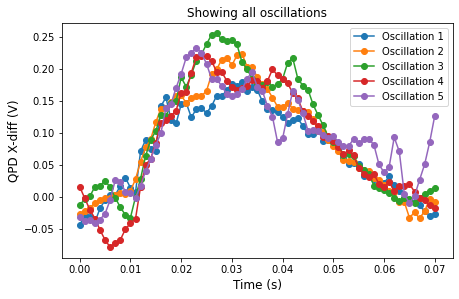

In [94]:
%matplotlib inline

fig,ax = plt.subplots(figsize=(7,7/1.618)) #create figure

starting_pt = 530

plt.title("Showing all oscillations")

time_of_cycle = np.arange(cycle_in_data_pts)/data['Fs']

ax.plot(time_of_cycle, data['inputData_0'][starting_pt:starting_pt+int(cycle_in_data_pts)],'-o', label="Oscillation 1")
ax.plot(time_of_cycle, data['inputData_0'][starting_pt+int(cycle_in_data_pts):starting_pt+int(2*cycle_in_data_pts)],'-o', label="Oscillation 2")
ax.plot(time_of_cycle, data['inputData_0'][starting_pt+int(2*cycle_in_data_pts):starting_pt+int(3*cycle_in_data_pts)],'-o', label="Oscillation 3")
ax.plot(time_of_cycle, data['inputData_0'][starting_pt+int(3*cycle_in_data_pts):starting_pt+int(4*cycle_in_data_pts)],'-o', label="Oscillation 4")
ax.plot(time_of_cycle, data['inputData_0'][starting_pt+int(4*cycle_in_data_pts):starting_pt+int(5*cycle_in_data_pts)],'-o', label="Oscillation 5")


ax.set_xlabel("Time (s)", fontsize=12, color='k')
ax.set_ylabel("QPD X-diff (V)", fontsize=12)

plt.legend()

In [95]:
avg_qpd_signal = (1/5)*(data['inputData_0'][starting_pt:starting_pt+int(cycle_in_data_pts)] + \
data['inputData_0'][starting_pt+int(cycle_in_data_pts):starting_pt+int(2*cycle_in_data_pts)] + \
data['inputData_0'][starting_pt+int(2*cycle_in_data_pts):starting_pt+int(3*cycle_in_data_pts)] + \
data['inputData_0'][starting_pt+int(3*cycle_in_data_pts):starting_pt+int(4*cycle_in_data_pts)] + \
data['inputData_0'][starting_pt+int(4*cycle_in_data_pts):starting_pt+int(5*cycle_in_data_pts)])

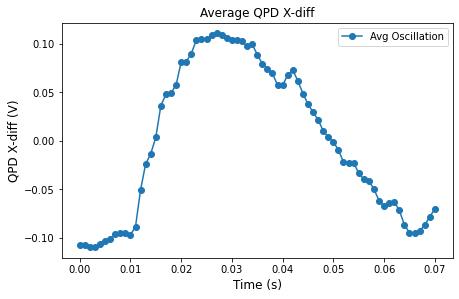

In [96]:
fig,ax = plt.subplots(figsize=(7,7/1.618)) #create figure

ax.plot(time_of_cycle, avg_qpd_signal - avg_qpd_signal.mean(),'-o', label="Avg Oscillation")

plt.title("Average QPD X-diff")

ax.set_xlabel("Time (s)", fontsize=12, color='k')
ax.set_ylabel("QPD X-diff (V)", fontsize=12)

plt.legend()

<IPython.core.display.Javascript object>


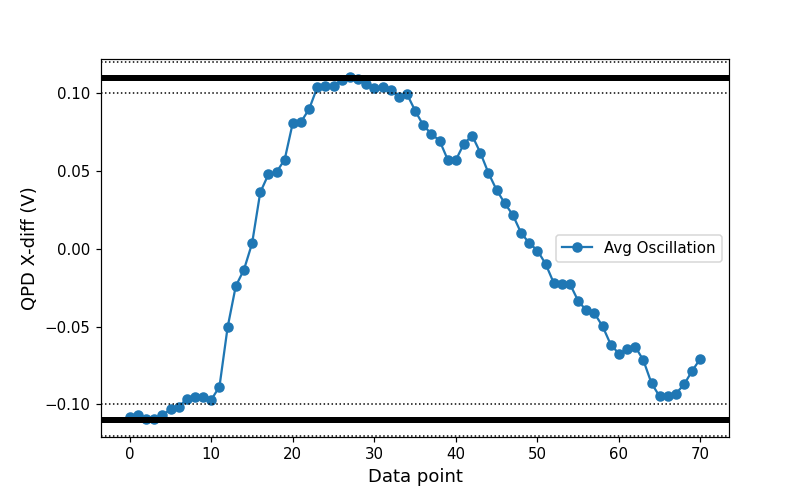

In [98]:
%matplotlib notebook

fig,ax = plt.subplots(figsize=(5,5/1.618)) #create figure

ax.plot(avg_qpd_signal - avg_qpd_signal.mean(),'-o', label="Avg Oscillation")

guess_qpd_signal = 0.11
guess_error = 0.01
ax.axhline(guess_qpd_signal, c='k', lw=4)
ax.axhline(-1*guess_qpd_signal, c='k', lw=4)
ax.axhline(guess_qpd_signal + guess_error, ls=':', c='k', lw=1)
ax.axhline(guess_qpd_signal - guess_error, ls=':', c='k', lw=1)
ax.axhline(-1*guess_qpd_signal + guess_error, ls=':', c='k', lw=1)
ax.axhline(-1*guess_qpd_signal - guess_error, ls=':', c='k', lw=1)


ax.set_xlabel("Data point", fontsize=12, color='k')
ax.set_ylabel("QPD X-diff (V)", fontsize=12)

plt.legend()